In [76]:
import time
import torch
from torch import nn
import torchvision.transforms as transforms
import torchvision.datasets as dset
import matplotlib.pyplot as plt
import numpy as np

In [108]:
step1 = nn.Sequential(
    nn.Conv2d(3,12,kernel_size=3,stride=1, padding=1),
    nn.BatchNorm2d(12),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
)

step2 = nn.Sequential(
    nn.Conv2d(12, 36, kernel_size=5,stride=1, padding=2),
    nn.BatchNorm2d(36)
)

step3 = nn.Sequential(
    nn.ConvTranspose2d(36,12, kernel_size=5,stride=2,
                       padding=2, output_padding=1),
    nn.BatchNorm2d(12),
    nn.ReLU()
)

step4 = nn.Sequential(
    nn.Conv2d(12,3, kernel_size=3,stride=1, padding=1),
    nn.BatchNorm2d(3),
    nn.Tanh()
)

In [109]:
img_size = 256
img_dir = "./maps/"
trainset = dset.ImageFolder(root=img_dir,
                            transform = transforms.Compose([
                            transforms.Scale(size=img_size),
                            transforms.CenterCrop(size=(img_size,
                            img_size*2)),
                            transforms.ToTensor(),
                            ]))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, 
                                          num_workers=2)

torch.Size([4, 3, 256, 512])
torch.Size([4, 12, 128, 256])
torch.Size([4, 36, 128, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 12, 256, 512])
torch.Size([4, 3, 256, 512])


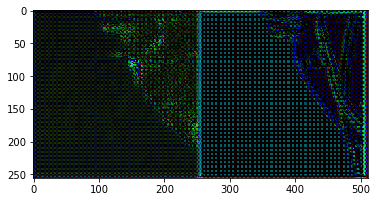

In [110]:
for i, (data, lab) in enumerate(trainloader):
    print(data.shape)
    data2 = step1(data)
    print(data2.shape)
    data3 = step2(data2)
    print(data3.shape)
    data4 = step3(data3)
    #data4 = torch.cat([data4, data2],dim=1)
    print(data4.shape)
    data5 = step4(data4)
    print(data5.shape)
    
    image = data5[1,0:3,:,:].detach()
    #print(image.shape)
    plt.imshow(np.transpose(image, (1,2,0)))
    plt.show()
    
    break
    print("\n\n")